In [40]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install textbLob

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 660.6 kB/s eta 0:00:20
      --------------------------------------- 0.2/12.8 MB 2.0 MB/s eta 0:00:07
      --------------------------------------- 0.3/12.8 MB 2.2 MB/s eta 0:00:06
     - -------------------------------------- 0.5/12.8 MB 2.7 MB/s eta 0:00:05
     - -------------------------------------- 0.6/12.8 MB 3.0 MB/s eta 0:00:05
     -- ------------------------------------- 0.9/12.8 MB 3.6 MB/s eta 0:00:04
     --- ------------------------------------ 1.1/12.8 MB 3.6 MB/s eta 0:00:04
     ---- ----------------------------------- 1.3/12.8 MB 4.0 MB/s eta 0:00:03
     ---- ----------------------------------- 1.5/12.8 MB 3.9 MB/s eta 0:00:03
     ---- ----------------------------------- 1.6/12.8 MB 4.

In [45]:
from bs4 import BeautifulSoup 

In [46]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd

In [47]:
df = pd.read_csv('C:/Users/Abhis/twitter_sentiment.csv', header=None, index_col=0)
df.head()

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [48]:
df = df[[2,3]].reset_index(drop=True)

In [49]:
df.columns = ['sentiment','text']
df.head(3)

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [51]:
df.isnull().sum()
df.dropna(inplace = True)
#df=df[df['text'].apply(len)]

In [52]:
sum(df['text'].apply(len)>5),sum(df['text'].apply(len)<=5)

(72883, 2113)

In [54]:
print(df.shape)
df=df[df['text'].apply(len)>5]
print(df.shape)

(72883, 2)
(72883, 2)


In [55]:
df['sentiment'].value_counts()

sentiment
Negative      22020
Positive      20186
Neutral       17899
Irrelevant    12778
Name: count, dtype: int64

In [56]:
#feature extraction
import preprocess_kgptalkie as ps
df.columns

Index(['sentiment', 'text'], dtype='object')

In [57]:
df = ps.get_basic_features(df)

In [58]:
df.columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

In [59]:
#Vizualization
!pip install matplotlib
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


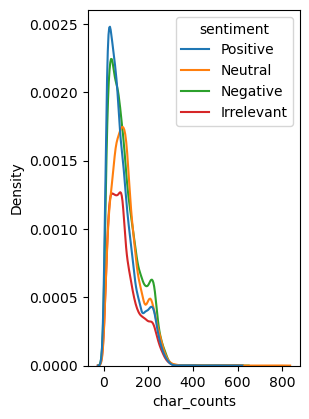

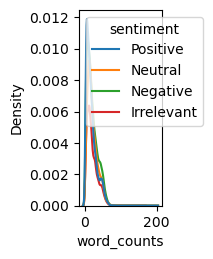

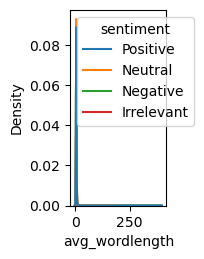

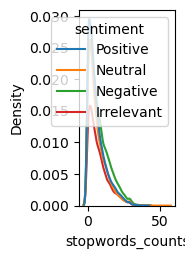

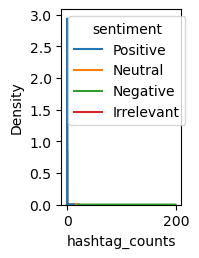

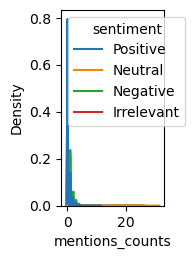

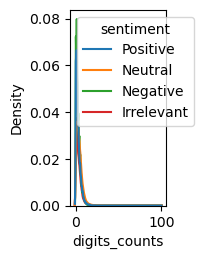

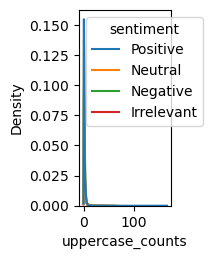

In [64]:
df.head()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
num_cols = df.select_dtypes(include='number').columns

for index,col in enumerate (num_cols):
    plt.subplot(2,4, index+1)
    sns.kdeplot(data=df, x=col, hue= "sentiment", fill=False)
    plt.tight_layout()
    plt.show()

<Axes: ylabel='count'>

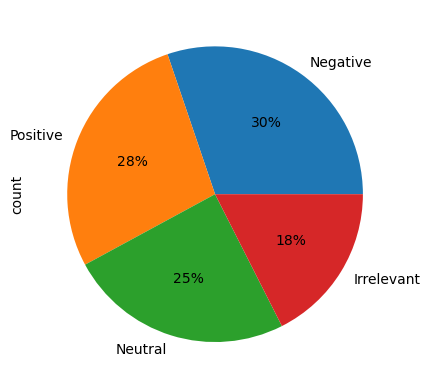

In [65]:
df['sentiment'].value_counts().plot(kind='pie', autopct="%1.0f%%")

In [25]:
##Word cloud visualization
#!pip install wordCloud

In [66]:
from wordcloud import WordCloud , STOPWORDS

stopwords = set(STOPWORDS)

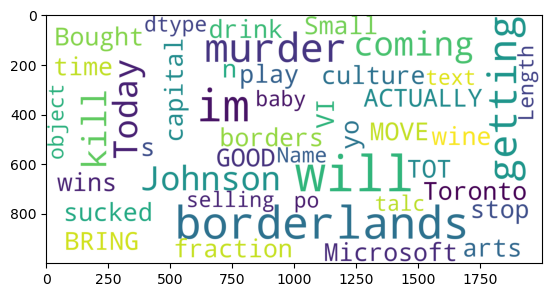

In [67]:
wordcloud = WordCloud(background_color='white',stopwords=stopwords,
                      max_words=300,max_font_size=40,scale=5).generate(str(df['text']))

plt.imshow(wordcloud)


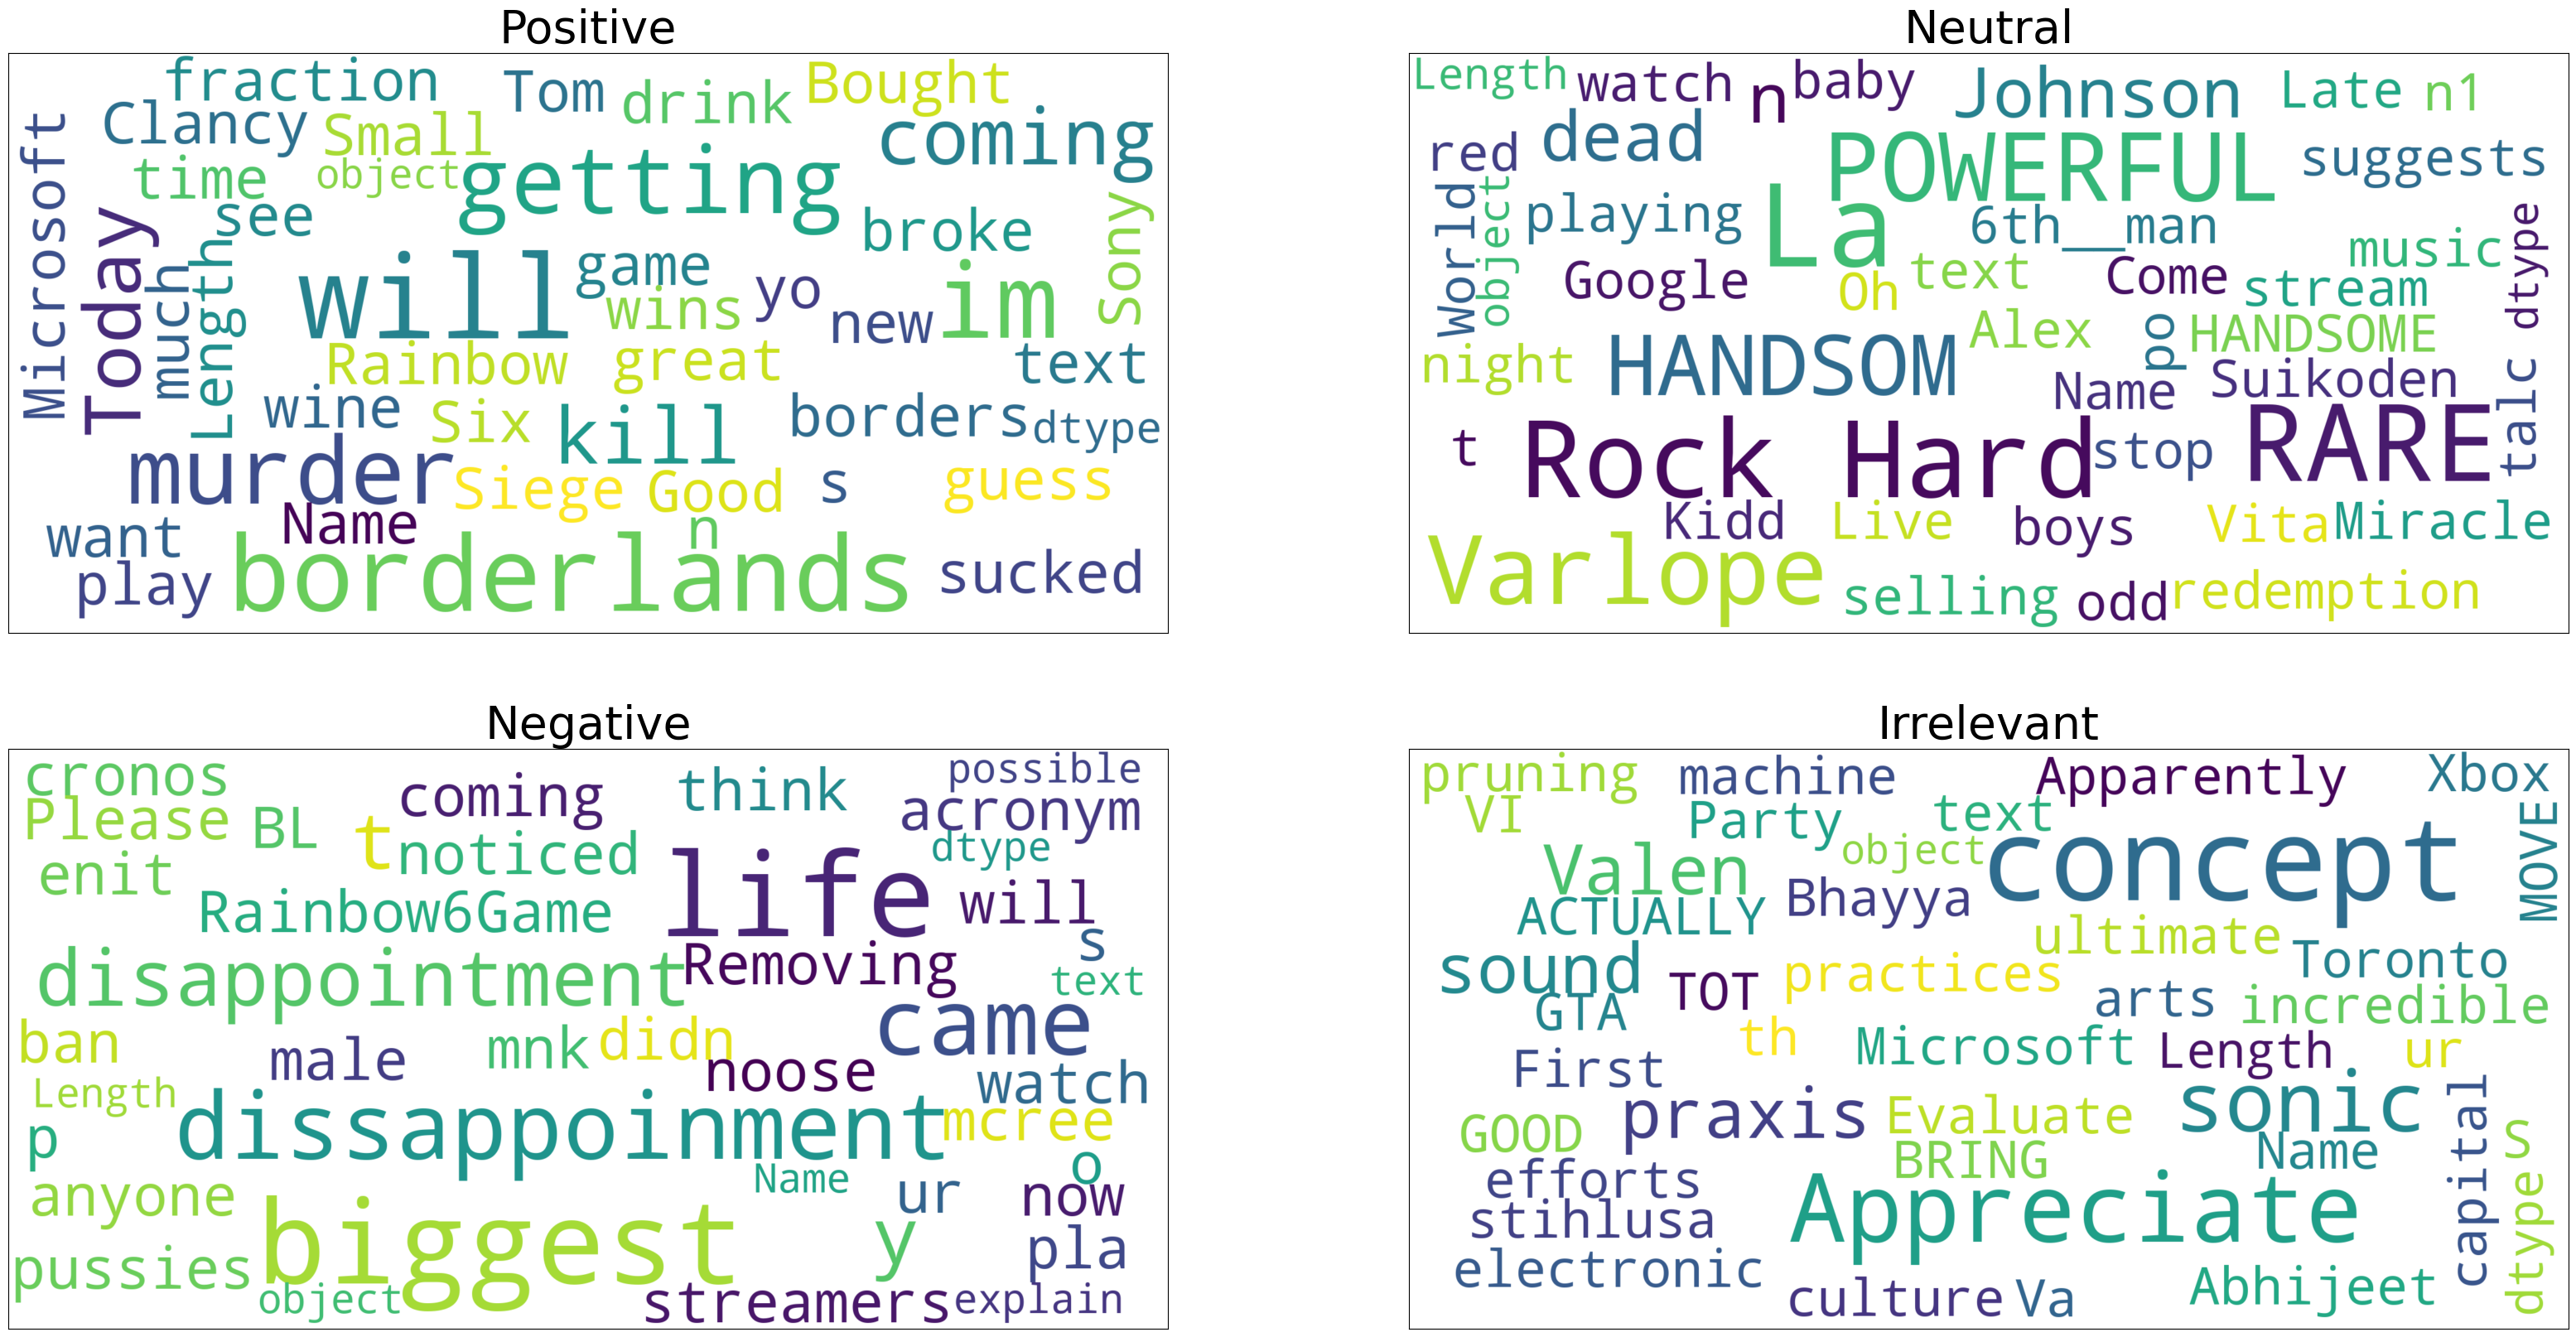

In [68]:
plt.figure(figsize=(40,20))
for index, sent in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2,index+1)
    data = df[df['sentiment'] == sent]['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords,
                          max_words=300, max_font_size=40, scale=5).generate(str(data))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.xticks([])
    plt.yticks([])
    plt.title(sent, fontsize=40)

In [ ]:
###Data cleaning

In [69]:
df['text']= df['text'].apply(lambda x: x.lower())
df['text']= df['text'].apply(lambda x: ps.remove_urls(x))
df['text']= df['text'].apply(lambda x:ps.remove_html_tags(x))
df['text']= df['text'].apply(lambda x: ps.remove_rt(x))
df['text']= df['text'].apply(lambda x: ps.remove_special_chars(x))


In [70]:
#Train test  split

from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'],
                                                    df['sentiment'],
                                                    test_size=0.2,
                                                    random_state=0)

In [71]:
X_train.shape, X_test.shape

((58306,), (14577,))

In [ ]:
#Model Building and Testing

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


In [73]:
clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rfc', RandomForestClassifier(n_jobs=-1))
])

clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [ ]:

##Evaluation

In [74]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.98      0.85      0.91      2561
    Negative       0.92      0.96      0.94      4481
     Neutral       0.92      0.92      0.92      3553
    Positive       0.91      0.94      0.92      3982

    accuracy                           0.92     14577
   macro avg       0.93      0.92      0.92     14577
weighted avg       0.93      0.92      0.92     14577



In [ ]:
#Testing our Twitter Sentiment analysis

In [75]:
import pickle
pickle.dump(clf,open("twitter_sentiment.pkl",'wb'))

In [76]:
clf.predict(['You are so good'])

array(['Positive'], dtype=object)

In [77]:
clf.predict(['let me  upset you'])

array(['Negative'], dtype=object)

In [78]:
clf.predict(['deepak is good boy'])

array(['Positive'], dtype=object)